In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
pmsystem_project_list_file = 'ProjectListExport_2022-05-20-09-13-56-082.xls'
cft_list_file = 'CFTListExport_2022-05-30-15-17-51-210.xls'
prweb_file = 'New Production Status Summary 2022-05-24.xlsx'

start_from = '2022-05'

consumer_dpqe_list = ['Lo, Aalto','Kuo, Chris','Wang, Cooper', 'Fu, Ernest','Hsu, Jason(PQE)','Ni, Wendy','Wang, Evelyn','Hsu, Jason(PQE);\nWang, Evelyn'] 
# 'Hsu, Jason(PQE);\nWang, Evelyn' is for GPSMAP 9000 series

# PM system

Read

In [138]:
pmsystem_project = pd.read_excel(pmsystem_project_list_file, usecols=[0,1,3,4,5,6,9,10,12], parse_dates=[2,3,4,5], index_col=[0])
pmsystem_cft = pd.read_excel(cft_list_file, usecols=[0,44], index_col=[0])

c:\Users\wangcooper\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [139]:
pmsystem_cft.head()

,Develop Product QE (DPQE)
Project ID,
13939,"Kuo, Chris"
15274,"Kuo, Chris"
15624,"Lo, Aalto"
13009,"Kuo, Chris"
14984,"Kuo, Chris"


In [140]:
pmsystem_project = pmsystem_project[(pmsystem_project['Global/Asia'] == 'Global') & (pmsystem_project['PDP/Form107'] == 'PDP')]

Merge project and CFT lists

In [141]:
pmsystem_project_cft = pd.merge(left=pmsystem_project, right=pmsystem_cft, left_index=True, right_index=True)
pmsystem_project_cft.sort_index().head()

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Status,Develop Product QE (DPQE)
Project ID,,,,,,,,,
2854,Product - GDC 7500,2013-04-30,NaT,2019-07-01,2018-10-12,Global,PDP,Development,"Kuo, Chris"
2914,Product - GTN 6xx/7xx,NaT,NaT,NaT,NaT,Global,PDP,Development,NaN
2930,Product - GWX 7000,2019-03-22,NaT,2021-09-09,2021-06-04,Global,PDP,Concepts,NaN
3753,Product - GDU 7XX,2015-08-14,NaT,2018-01-26,2017-01-05,Global,PDP,Development,NaN
3767,HIRF & Lightning System Cert,NaT,NaT,NaT,NaT,Global,PDP,Development,NaN


Find projects w/o DPQE

In [142]:
pmsystem_project_cft[pmsystem_project_cft['Develop  Product QE (DPQE)'].isnull()].dropna(thresh=5, axis=0).loc[(pmsystem_project_cft['MP Date']>start_from)]

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Status,Develop Product QE (DPQE)
Project ID,,,,,,,,,
16246,Next gen GMR magnetron domes (18/24xHD replace...,2022-08-11,2022-09-28,2023-03-06,2023-01-11,Global,PDP,Development,NaN
16176,Approach S70,2022-07-13,2022-10-28,2023-03-20,2023-01-27,Global,PDP,Development,NaN
16095,Cellular Tracking Module,2022-12-08,2023-04-13,2023-09-07,2023-07-13,Global,PDP,Development,NaN
16218,EPIX PRO (Gen 2) 51mm,2022-06-17,2022-08-09,2023-01-16,2022-11-15,Global,PDP,Development,NaN


In [143]:
pmsystem_project_cft[pmsystem_project_cft['Develop  Product QE (DPQE)'].isnull()].dropna(thresh=5, axis=0).loc[(pmsystem_project_cft['MP Date']>start_from)].to_excel('(Output) Projects in PM system without DPQE.xlsx')

Find projects with multi-DPQE

In [144]:
multi_dpqe = pmsystem_project_cft[['Project Name','Develop  Product QE (DPQE)']]
multi_dpqe.dropna(inplace=True)

<ipython-input-144-b88a861ff4ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_dpqe.dropna(inplace=True)


In [145]:
multi_dpqe[multi_dpqe['Develop  Product QE (DPQE)'].str.contains('\n')]

,Project Name,Develop Product QE (DPQE)
Project ID,,
9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn"
7058,BMW MGU MY20,"Chen, Tiffany(QA);\nPuder, Kristi;\nKelly, Joa..."
10718,BMW MGU22,"Chen, Tiffany(QA);\nKelly, Joan;\nBruns, Melan..."
11304,Daimler_VIS20_2020,"Tsai, Cherry;\nPeranovic, Predrag;\nNefzger, B..."
10762,Honda MKSA,"Chen, Tiffany(QA);\nYu, Arthur"


Melt

In [146]:
df_consumer_dpqe = pmsystem_project_cft[pmsystem_project_cft['Develop  Product QE (DPQE)'].isin(consumer_dpqe_list)].sort_index()
df_consumer_dpqe.head()

,Project Name,Working Prototype Built and Tested,Final Factory Prototypes Built,MP Date,PR Date,Global/Asia,PDP/Form107,Status,Develop Product QE (DPQE)
Project ID,,,,,,,,,
2854,Product - GDC 7500,2013-04-30,NaT,2019-07-01,2018-10-12,Global,PDP,Development,"Kuo, Chris"
5711,Product - GLA 85,2014-10-30,NaT,2018-12-07,2016-08-31,Global,PDP,Development,"Kuo, Chris"
7011,Xero G1(s) SatCom Scouting Camera,2020-03-03,2020-11-09,2022-05-25,2021-08-27,Global,PDP,Development,"Kuo, Chris"
7029,Alpha Dog Collar,2021-11-18,2022-07-11,2022-11-08,2022-09-27,Global,PDP,Development,"Kuo, Chris"
7563,Mercury,NaT,NaT,2022-01-17,2021-04-23,Global,PDP,Development,"Fu, Ernest"


In [147]:
value_vars = ['Working Prototype Built and Tested','Final Factory Prototypes Built','PR Date','MP Date']

pmsystem_project_dpqe_melted = df_consumer_dpqe.reset_index().melt(id_vars= ['Project ID','Project Name','Develop  Product QE (DPQE)'],value_vars=value_vars)
pmsystem_project_dpqe_melted.head()

,Project ID,Project Name,Develop Product QE (DPQE),variable,value
0,2854,Product - GDC 7500,"Kuo, Chris",Working Prototype Built and Tested,2013-04-30
1,5711,Product - GLA 85,"Kuo, Chris",Working Prototype Built and Tested,2014-10-30
2,7011,Xero G1(s) SatCom Scouting Camera,"Kuo, Chris",Working Prototype Built and Tested,2020-03-03
3,7029,Alpha Dog Collar,"Kuo, Chris",Working Prototype Built and Tested,2021-11-18
4,7563,Mercury,"Fu, Ernest",Working Prototype Built and Tested,NaT


In [148]:
pmsystem_project_dpqe_melted.rename(columns={'Develop  Product QE (DPQE)':'DPQE','variable':'Phase','value':'Date'},inplace=True)

In [149]:
pmsystem_project_dpqe_melted.Date = pmsystem_project_dpqe_melted.Date.dt.strftime('%Y-%m')

In [150]:
pmsystem_project_dpqe_melted = pmsystem_project_dpqe_melted[pmsystem_project_dpqe_melted.Date >= start_from]

In [151]:
pmsystem_project_dpqe_melted.isnull().sum()

Project ID      0
Project Name    0
DPQE            0
Phase           0
Date            0
dtype: int64

Weight socre

In [152]:
pmsystem_project_dpqe_melted.loc[:,'weighted_score'] = pmsystem_project_dpqe_melted.loc[:,'Phase'].apply(lambda phase : 1 if (phase == 'Working Prototype Built and Tested') | (phase == 'MP Date') else 2 if phase=='Final Factory Prototypes Built' else 3 if phase=='PR Date' else 0)

In [153]:
pmsystem_project_dpqe_melted = pmsystem_project_dpqe_melted.rename(columns={"Project ID":'PM Project Id','Project Name':'PM Project Name'})

In [154]:
pmsystem_project_dpqe_melted.head()

,PM Project Id,PM Project Name,DPQE,Phase,Date,weighted_score
6,8510,Xero L60i Laser Navigator,"Kuo, Chris",Working Prototype Built and Tested,2022-05,1
9,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1
20,11778,Tire Temp Sensor,"Ni, Wendy",Working Prototype Built and Tested,2022-08,1
30,12799,Descent S1 Buoy,"Lo, Aalto",Working Prototype Built and Tested,2022-07,1
35,12994,Descent Mk3,"Wang, Cooper",Working Prototype Built and Tested,2022-12,1


# PRweb

Read

In [155]:
prweb = pd.read_excel(prweb_file, header=1, usecols=[0,3])
prweb.head()

,Project Name,PM Project Id
0,Xero B60i Laser Navigation Binoculars,13229
1,LED Control Module,13134
2,Descent Mk3 Series - Small,12994
3,Descent Mk3 Series - Large,12994
4,IMWW23,14434


Merge with data from PMsystem

In [156]:
prweb_pmsystem = pd.merge(left=pmsystem_project_dpqe_melted, right=prweb, how='left', left_on='PM Project Id', right_on='PM Project Id', suffixes=['_PMsystem','_prweb'])

In [157]:
prweb_pmsystem.head()

,PM Project Id,PM Project Name,DPQE,Phase,Date,weighted_score,Project Name
0,8510,Xero L60i Laser Navigator,"Kuo, Chris",Working Prototype Built and Tested,2022-05,1,Xero L60i Laser Navigator
1,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 19"""
2,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 24"""
3,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 -27"""
4,9946,GPSMAP 9000,"Hsu, Jason(PQE);\nWang, Evelyn",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 22"""


Handle GPSMAP 9000 19"

In [158]:
'Hsu, Jason(PQE);\nWang, Evelyn'.replace('\n','').split(';')

['Hsu, Jason(PQE)', 'Wang, Evelyn']

In [159]:
# GPSMAP 9000 - 19" to Wang, Evelyn, others to Hsu, Jason(PQE)
def gpsmap_9000 (project_name, DPQE):
    if project_name == 'GPSMAP 9000 - 19"':
        return DPQE.replace('\n','').split(';')[1] #Wang, Evelyn
    elif project_name in ['GPSMAP 9000 - 22"','GPSMAP 9000 - 24"','GPSMAP 9000 -27"','GPSMAP 9000_Black Box']:
        return DPQE.replace('\n','').split(';')[0] #Hsu, Jason(PQE)
    else:
        return DPQE


In [160]:
prweb_pmsystem['DPQE'] = np.vectorize(gpsmap_9000)(prweb_pmsystem['Project Name'],prweb_pmsystem['DPQE'])

In [161]:
prweb_pmsystem[prweb_pmsystem['PM Project Name'] == 'GPSMAP 9000']

,PM Project Id,PM Project Name,DPQE,Phase,Date,weighted_score,Project Name
1,9946,GPSMAP 9000,"Wang, Evelyn",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 19"""
2,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 24"""
3,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 -27"""
4,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,"GPSMAP 9000 - 22"""
5,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Working Prototype Built and Tested,2022-06,1,GPSMAP 9000_Black Box
42,9946,GPSMAP 9000,"Wang, Evelyn",Final Factory Prototypes Built,2022-11,2,"GPSMAP 9000 - 19"""
43,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Final Factory Prototypes Built,2022-11,2,"GPSMAP 9000 - 24"""
44,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Final Factory Prototypes Built,2022-11,2,"GPSMAP 9000 -27"""
45,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Final Factory Prototypes Built,2022-11,2,"GPSMAP 9000 - 22"""
46,9946,GPSMAP 9000,"Hsu, Jason(PQE)",Final Factory Prototypes Built,2022-11,2,GPSMAP 9000_Black Box


# Heatmap

In [162]:
prweb_pmsystem.groupby(['DPQE','Project Name','Date']).sum()['weighted_score'].sort_index(level='Date').unstack().to_excel('(Output) prweb_pmsystem_weighted.xlsx')

Overall w/o project names

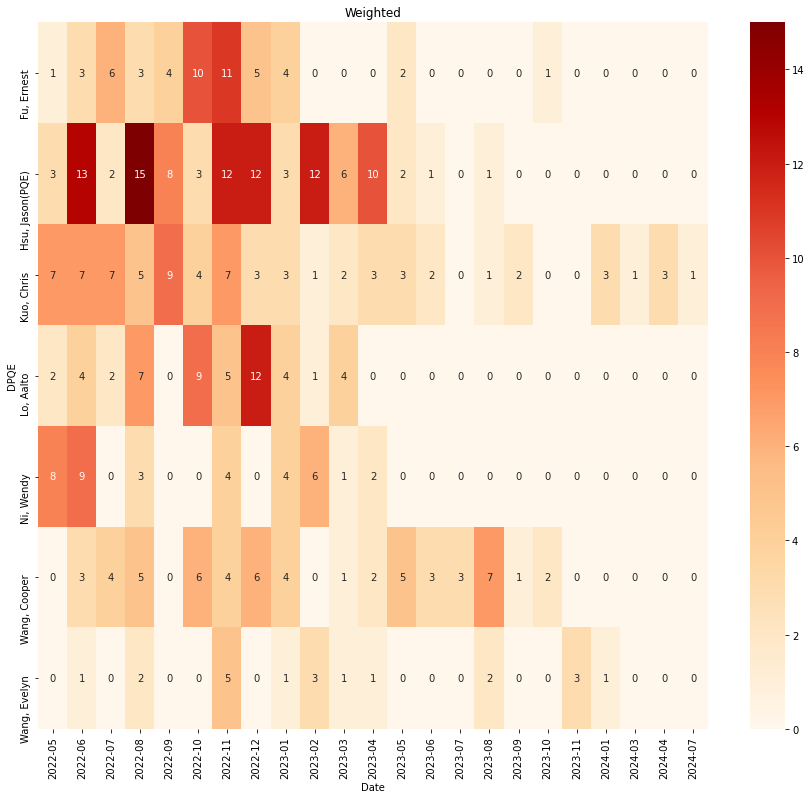

In [163]:
plt.figure(figsize=(15,13))
sns.heatmap(prweb_pmsystem.groupby(['DPQE','Date']).sum()['weighted_score'].sort_index(level='Date').unstack(fill_value=0), cmap="OrRd", annot=True, linecolor='orange').set_title('Weighted');

Overall with project names

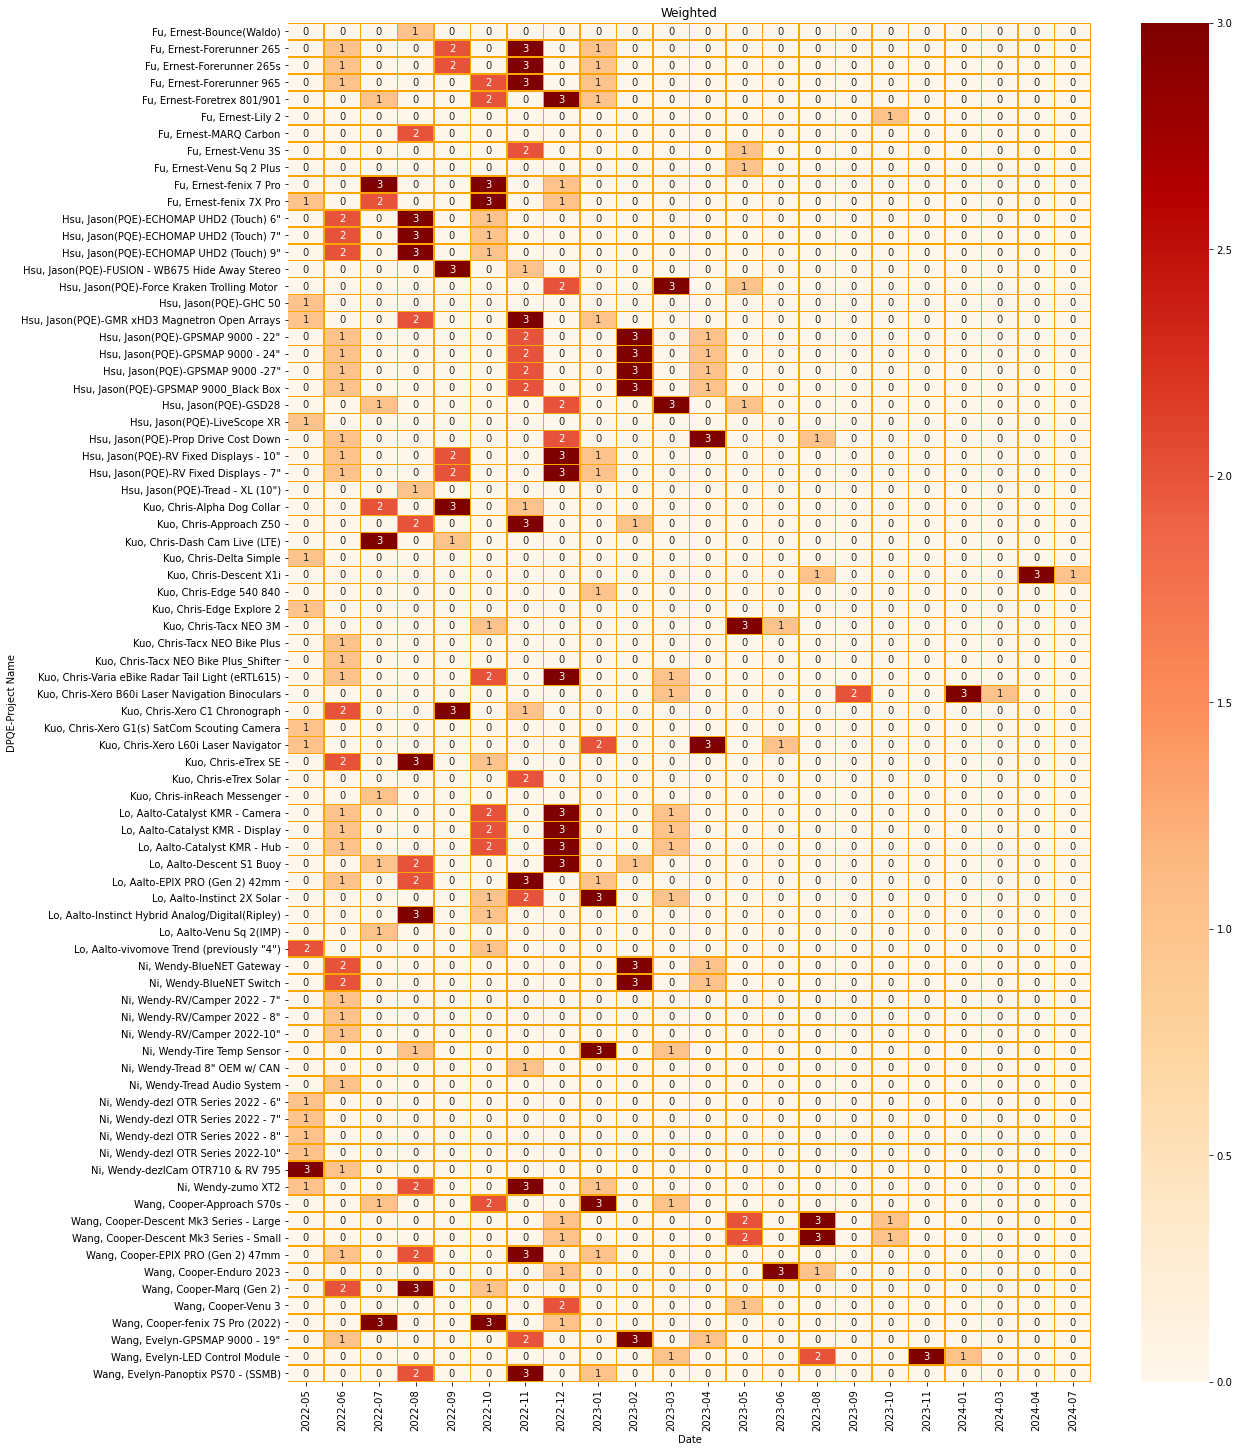

In [164]:
plt.figure(figsize=(18,25))
sns.heatmap(prweb_pmsystem.groupby(['DPQE','Project Name','Date']).sum()['weighted_score'].sort_index(level='Date').unstack(fill_value=0), cmap="OrRd", annot=True,linewidths=0.5, linecolor='orange').set_title('Weighted');

In [165]:
prweb_pmsystem.groupby(['DPQE','Project Name','Date']).sum()

PM Project Id  weighted_score
DPQE         Project Name           Date                                  
Fu, Ernest   Bounce(Waldo)          2022-08          10919               1
             Forerunner 265         2022-06          14529               1
                                    2022-09          14529               2
                                    2022-11          14529               3
                                    2023-01          14529               1
...                                                    ...             ...
Wang, Evelyn LED Control Module     2023-11          13134               3
                                    2024-01          13134               1
             Panoptix PS70 - (SSMB) 2022-08          10091               2
                                    2022-11          10091               3
                                    2023-01          10091               1

[213 rows x 2 columns]

Details for each DPQE

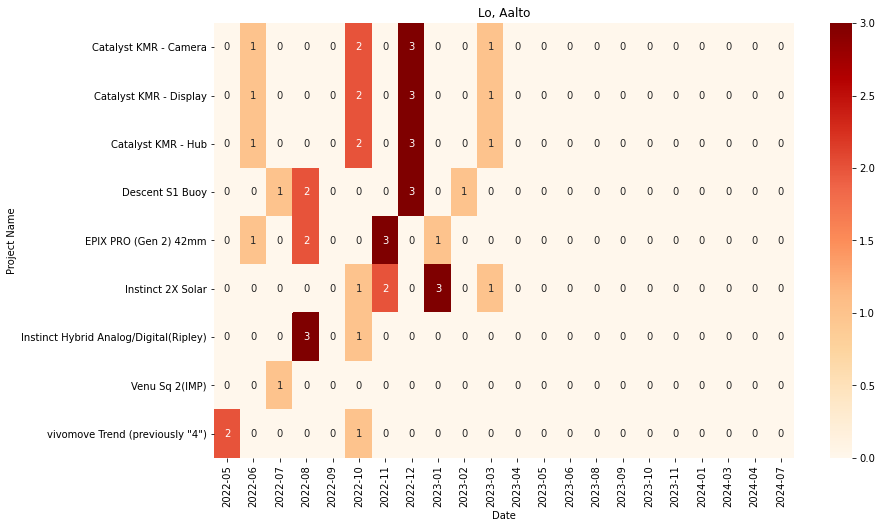

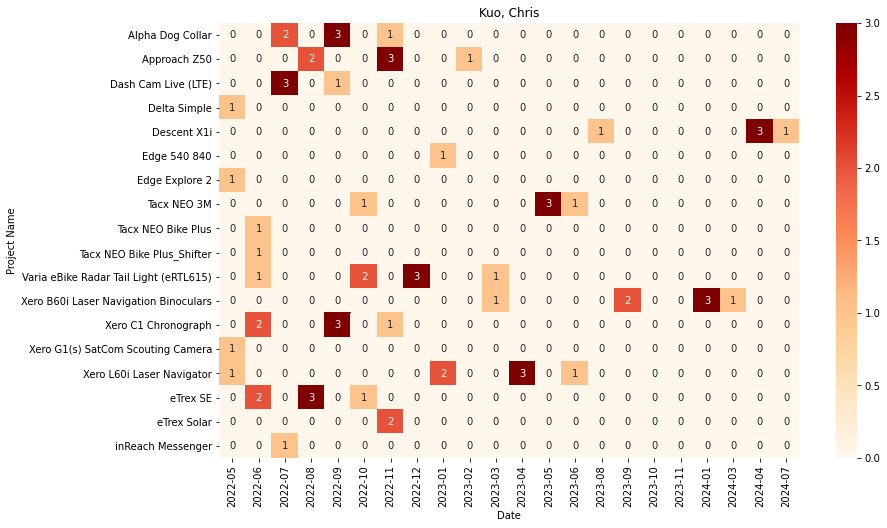

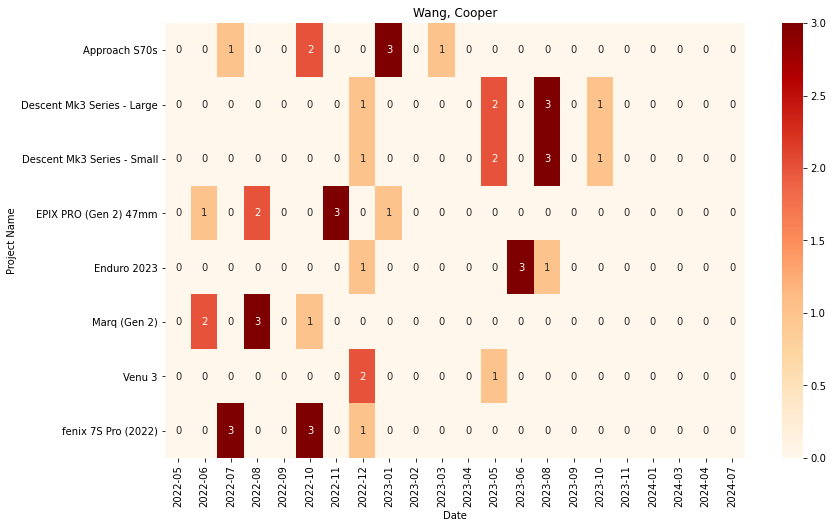

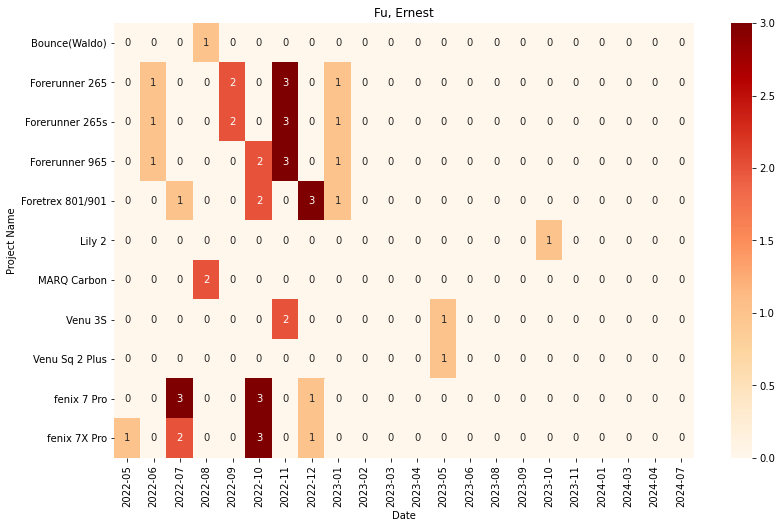

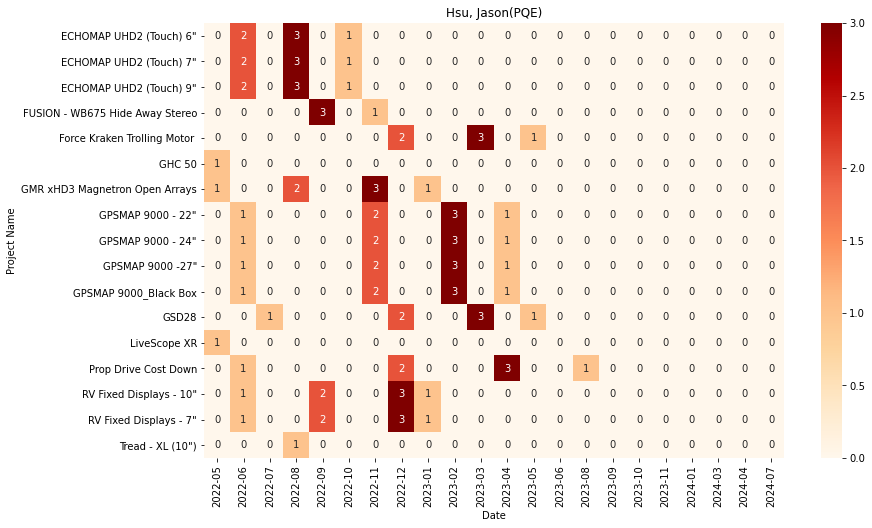

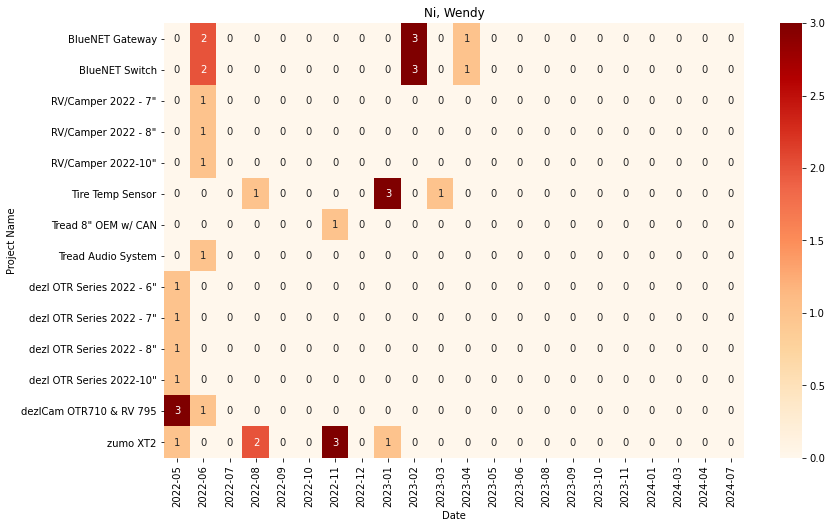

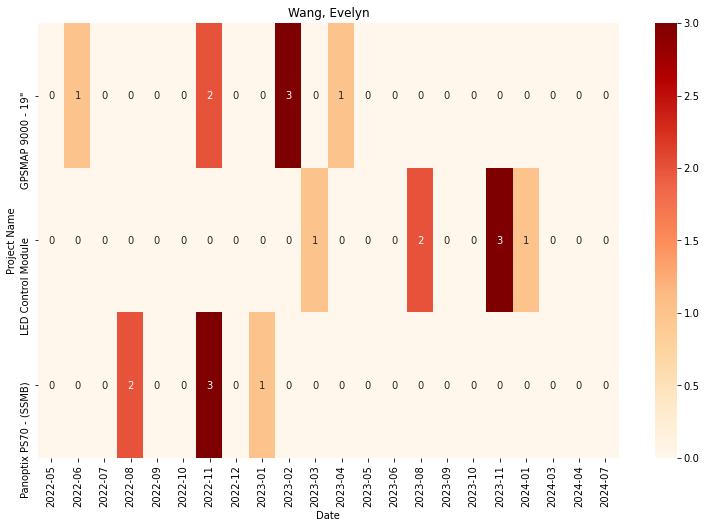

In [166]:
for member in consumer_dpqe_list[:-1]: #-1 is to skip 'Hsu, Jason(PQE);\nWang, Evelyn' in list
    plt.figure(figsize=(13,8))
    sns.heatmap(prweb_pmsystem.groupby(['DPQE','Project Name','Date']).sum()['weighted_score'].sort_index(level='Date').unstack(fill_value=0).loc[member],cmap="OrRd", annot=True).set(title=member);